In [2]:
import pandas as pd
surf_csv_path = r'c:\Users\efeka\Downloads\adni1_surfaces_ucsffsx_4_15_2025.csv'
tadpole_path = r'C:\Users\efeka\Documents\GitHub\gnn-healthcare-thesis\imputation\TADPOLE_D1_D2_sorted_imputed.csv'
ucsffsx_path = r'C:\Users\efeka\Documents\GitHub\MIND\mind_adni1_bl\UCSFFSX_11_02_15_09Apr2025.csv'
tadpole = pd.read_csv(tadpole_path)
surf_files =pd.read_csv(surf_csv_path)
ucsffsx = pd.read_csv(ucsffsx_path)

In [3]:
surf_ids = surf_files['Subject'].unique().tolist()
tadpole_ids = tadpole['PTID'].unique().tolist()
ucsffsx_ids = ucsffsx['RID'].unique().tolist()

In [4]:
#Find the intersection of the two lists, difference and union
intersection = set(surf_ids).intersection(set(tadpole_ids))
difference = set(surf_ids).difference(set(tadpole_ids))
union = set(surf_ids).union(set(tadpole_ids))

# print the length of the lists
print(f'Number of IDs in surf: {len(surf_ids)}')
print(f'Number of IDs in tadpole: {len(tadpole_ids)}')
print(f'Number of IDs in intersection: {len(intersection)}')
print(f'Number of IDs in difference: {len(difference)}')
print(f'Number of IDs in union: {len(union)}')

# Print the IDs in the difference


Number of IDs in surf: 841
Number of IDs in tadpole: 1737
Number of IDs in intersection: 818
Number of IDs in difference: 23
Number of IDs in union: 1760


### View Image IDs

In [ ]:
tadpole_image = tadpole[['RID', 'PTID', 'VISCODE', 'IMAGEUID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16']]
tadpole_image = tadpole_image[tadpole_image['RID'].isin(ucsffsx_ids)]

,RID,PTID,VISCODE,IMAGEUID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,2,011_S_0002,bl,35475
1,2,011_S_0002,m06,
2,2,011_S_0002,m36,
3,2,011_S_0002,m60,
4,2,011_S_0002,m66,
...,...,...,...,...
6935,1430,128_S_1430,bl,79857
6936,1430,128_S_1430,m06,124184
6937,1430,128_S_1430,m18,
6938,1430,128_S_1430,m24,


In [7]:
subject_id = ucsffsx_ids[0]
tadpole_image[tadpole_image['RID']==subject_id]

,RID,PTID,VISCODE,IMAGEUID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,2,011_S_0002,bl,35475
1,2,011_S_0002,m06,
2,2,011_S_0002,m36,
3,2,011_S_0002,m60,
4,2,011_S_0002,m66,
5,2,011_S_0002,m72,
6,2,011_S_0002,m78,
7,2,011_S_0002,m84,
8,2,011_S_0002,m90,
9,2,011_S_0002,m96,


In [12]:
ucsffsx[['RID', 'VISCODE', 'IMAGEUID']][ucsffsx['RID']==subject_id]

,RID,VISCODE,IMAGEUID
0,2,sc,35475


In [13]:
surf_files[surf_files['Subject']==tadpole_image[tadpole_image['RID']==subject_id]['PTID'].values[0]]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
1888,I252183,011_S_0002,CN,M,74,sc,MRI,FreeSurfer Cross-Sectional Processing surfaces,Post-processed,8/26/2005,FS,4/08/2025


### Plot Distributions

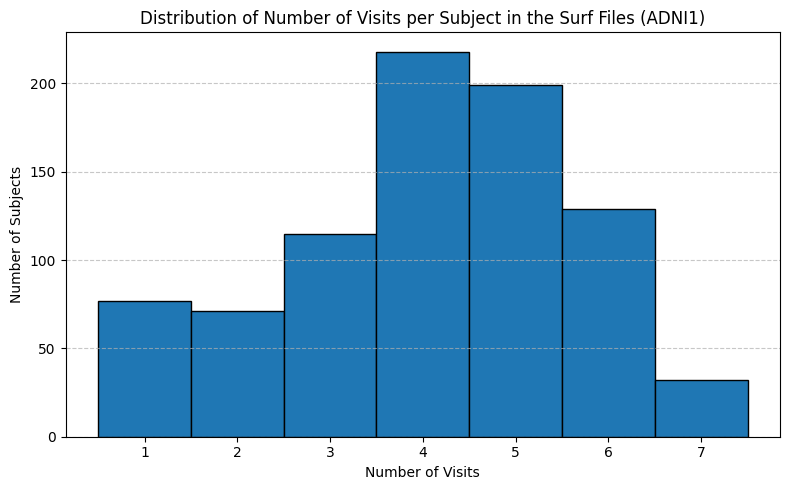

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called surf_files and has columns 'Subject' and 'Visit'

# Count the number of visits per subject
visit_counts = surf_files.groupby('Subject')['Visit'].nunique()

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(visit_counts, bins=range(1, visit_counts.max()+2), edgecolor='black', align='left')
plt.title('Distribution of Number of Visits per Subject in the Surf Files (ADNI1)' )
plt.xlabel('Number of Visits')
plt.ylabel('Number of Subjects')
plt.xticks(range(1, visit_counts.max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


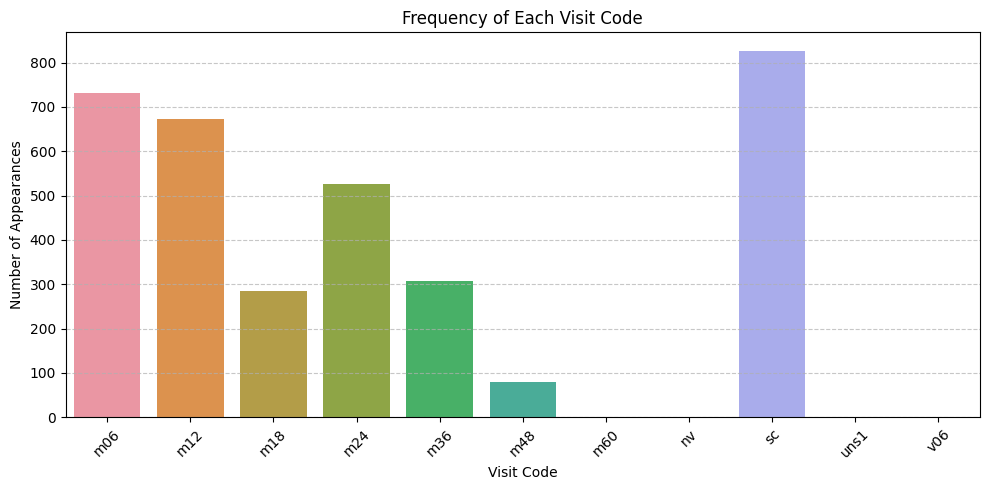

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each unique visit code
visit_counts = surf_files['Visit'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=visit_counts.index, y=visit_counts.values)
plt.title('Frequency of Each Visit Code')
plt.xlabel('Visit Code')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
surf_files['Visit'] = surf_files['Visit'].replace('sc', 'bl')
# First, get the matching subject-visit pairs from surf_files
keys_df = surf_files[['Subject', 'Visit']].drop_duplicates()

# Then merge to retrieve only matching rows from tadpole
matched_tadpole_rows = pd.merge(
    tadpole,
    keys_df,
    left_on=['PTID', 'VISCODE'],
    right_on=['Subject', 'Visit'],
    how='inner'
).drop(columns=['Subject', 'Visit'])

In [31]:
matched_tadpole_rows['COLPROT'].value_counts()

COLPROT
ADNI1     3385
ADNIGO      16
Name: count, dtype: int64